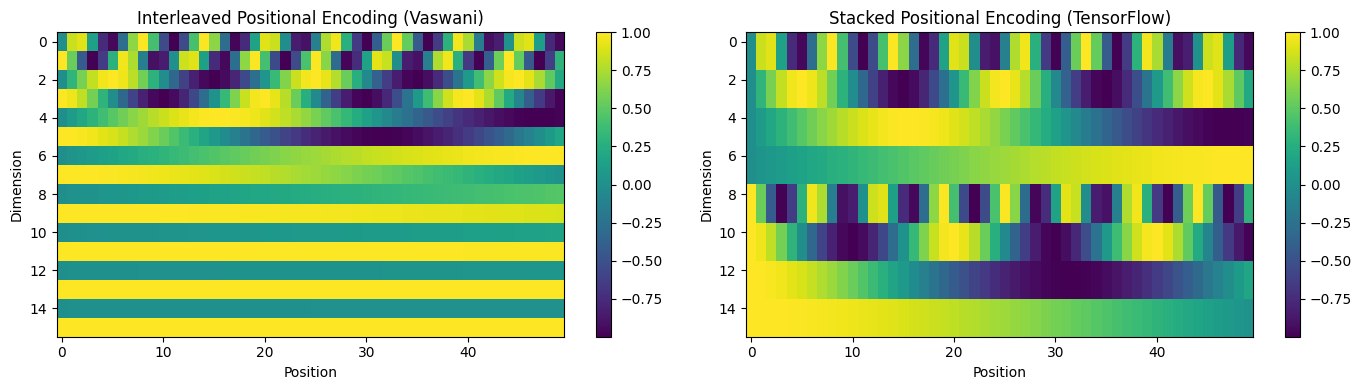

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
position = np.arange(0, 50)  # 50 positions
d_model = 16  # embedding dimension
half_d_model = d_model // 2

# Compute the positional encodings (same logic as in Vaswani et al.)
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos[:, np.newaxis] * angle_rates

angle_rads = get_angles(np.arange(50), np.arange(d_model), d_model)

# Interleaved: sin at even, cos at odd indices
interleaved_pe = np.copy(angle_rads)
interleaved_pe[:, 0::2] = np.sin(interleaved_pe[:, 0::2])
interleaved_pe[:, 1::2] = np.cos(interleaved_pe[:, 1::2])

# Stacked: first half sin, second half cos
stacked_pe = np.zeros_like(angle_rads)
stacked_pe[:, :half_d_model] = np.sin(angle_rads[:, :half_d_model])
stacked_pe[:, half_d_model:] = np.cos(angle_rads[:, :half_d_model])

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
im1 = axes[0].imshow(interleaved_pe.T, aspect='auto', cmap='viridis')
axes[0].set_title("Interleaved Positional Encoding (Vaswani)")
axes[0].set_xlabel("Position")
axes[0].set_ylabel("Dimension")
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(stacked_pe.T, aspect='auto', cmap='viridis')
axes[1].set_title("Stacked Positional Encoding (TensorFlow)")
axes[1].set_xlabel("Position")
axes[1].set_ylabel("Dimension")
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()
